# THIS IS THE TRIAL ON MATPLOTLIB USING PANDAS DATA FRAME

## WE WILL USE THE car_sales csv as our example.

In [1]:
# importing and managing all libs we need
import numpy as np
import pandas as pd
# magic function on matplotlob 
%matplotlib inline
import matplotlib.pyplot as plt

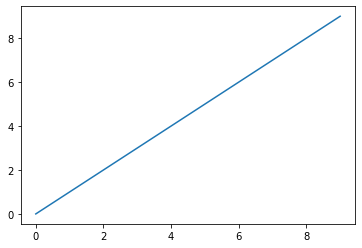

In [4]:
# test 
trialData = range(10)
plt.plot(trialData);

In [14]:
# import the cas sales dataset
car_sales = pd.read_csv('../data/car-sales.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [16]:
# Note that the Price is still in String format thus it willnot be considered as value
# thus we need to change it to int or float 
# first we remove non digits characters frotmthe column price
car_sales['Price'] = car_sales['Price'].str.replace('\D','', regex=True).astype(int)/100
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


In [21]:
# let's make a new column for total sales:
car_sales['Total Sales'] = car_sales['Price'].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Total Sales
0,Toyota,White,150043,4,4000.0,4000.0
1,Honda,Red,87899,4,5000.0,9000.0
2,Toyota,Blue,32549,3,7000.0,16000.0
3,BMW,Black,11179,5,22000.0,38000.0
4,Nissan,White,213095,4,3500.0,41500.0
5,Toyota,Green,99213,4,4500.0,46000.0
6,Honda,Blue,45698,4,7500.0,53500.0
7,Honda,Blue,54738,4,7000.0,60500.0
8,Toyota,White,60000,4,6250.0,66750.0
9,Nissan,White,31600,4,9700.0,76450.0


In [23]:
# let's simulate this as date of sales
car_sales["Sale Date"] = pd.date_range('1/1/2020', periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Total Sales,Sale Date
0,Toyota,White,150043,4,4000.0,4000.0,2020-01-01
1,Honda,Red,87899,4,5000.0,9000.0,2020-01-02
2,Toyota,Blue,32549,3,7000.0,16000.0,2020-01-03
3,BMW,Black,11179,5,22000.0,38000.0,2020-01-04
4,Nissan,White,213095,4,3500.0,41500.0,2020-01-05
5,Toyota,Green,99213,4,4500.0,46000.0,2020-01-06
6,Honda,Blue,45698,4,7500.0,53500.0,2020-01-07
7,Honda,Blue,54738,4,7000.0,60500.0,2020-01-08
8,Toyota,White,60000,4,6250.0,66750.0,2020-01-09
9,Nissan,White,31600,4,9700.0,76450.0,2020-01-10


### Now to make plot on pandas data frame we can just address the data frame to plot function 
Note: as long as we already import matplotlib.pyplot. 
Thus we can just call it just like making other plot 

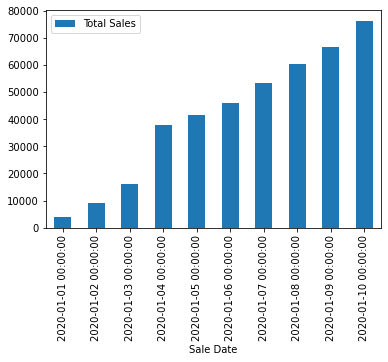

In [29]:
# now let's try to plot sale date as x axis and total sales as y axis
car_sales.plot(x='Sale Date', y='Total Sales', kind='bar');

#### pandas.dataframe.plot() function => https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

 DataFrame.plot(*args, **kwargs)[source]

    Make plots of Series or DataFrame.

    Uses the backend specified by the option plotting.backend. By default, matplotlib is used.

    Parameters

        dataSeries or DataFrame

         x   The object for which the method is called.
        xlabel or position, default None

          y Only used if data is a DataFrame.
        ylabel, position or list of label, positions, default None

            Allows plotting of one column versus another. Only used if data is a DataFrame.
        kindstr

            The kind of plot to produce:

                ‘line’ : line plot (default)

                ‘bar’ : vertical bar plot
                
                'barh' : horizontal bar'

### Now let's try to make car sales odometer and price in scatter type chart


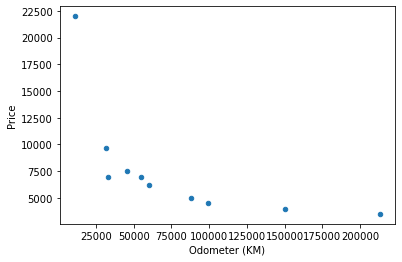

In [38]:
car_sales.plot(x='Odometer (KM)', y='Price', kind="scatter");

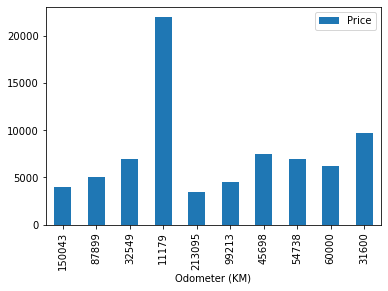

In [40]:
car_sales.plot(x='Odometer (KM)', y='Price', kind="bar");

#### WARNING: SEE HOW THE BAR AND SCATTER SEEMS NOT IN SYNC TO THE DATA?

This is not a mistake!! This is because scatter will have axes of values in the same interval starts from 0 to min or max!!

Meanwhile the Bar chart does not have this, Bar chart will just plot in accordance how the data is written in the dataframe.

We can do similar but that means we need to make the dataframe sort according to the odometer KM ascending.

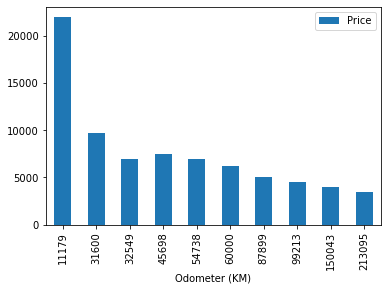

In [43]:
# Here the example on how to make the bar chart more like scatter 
# after sorting the car_sales dataframe according to Odomenter (KM)
car_sales.sort_values(by="Odometer (KM)").plot(x='Odometer (KM)', y='Price', kind="bar");